In [5]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
!pip install conda-package-handling
!wget https://anaconda.org/conda-forge/ta-lib/0.5.1/download/linux-64/ta-lib-0.5.1-py311h9ecbd09_0.conda
!cph x ta-lib-0.5.1-py311h9ecbd09_0.conda
!mv ./ta-lib-0.5.1-py311h9ecbd09_0/lib/python3.11/site-packages/talib /usr/local/lib/python3.11/dist-packages/
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4139    0  4139    0     0  13632      0 --:--:-- --:--:-- --:--:-- 13615
100  517k  100  517k    0     0   540k      0 --:--:-- --:--:-- --:--:--  540k
--2025-05-30 18:56:36--  https://anaconda.org/conda-forge/ta-lib/0.5.1/download/linux-64/ta-lib-0.5.1-py311h9ecbd09_0.conda
Resolving anaconda.org (anaconda.org)... 104.19.145.37, 104.19.144.37, 2606:4700::6813:9025, ...
Connecting to anaconda.org (anaconda.org)|104.19.145.37|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://binstar-cio-packages-prod.s3.amazonaws.com/5f738b4b78d4370a69f82984/673b62920c609ff6945bb24d?response-content-disposition=attachment%3B%20filename%3D%22ta-lib-0.5.1-py311h9ecbd09_0.conda%22%3B%20filename%2A%3DUTF-8%27%27ta-lib-0.5.1-py311h9ecbd09_0.conda&response-content-type=application%2Foctet-stream&X-Amz-Algorithm=

In [6]:
!pip install  pynance yfinance --quiet

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import talib
import seaborn as sns

# Load the CSV file

df = pd.read_csv('AAPL_historical_data.csv')  # Adjust the path

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort data by date to ensure time series correctness
df.sort_values('Date', inplace=True)

# Set 'Date' as index to make it time-series friendly
df.set_index('Date', inplace=True)

# Display the first few rows to understand the structure
df.head()


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [9]:
# Calculate 20-day Simple Moving Average (SMA)
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)

# Calculate Relative Strength Index (RSI) with 14-day window
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

# Calculate MACD (Moving Average Convergence Divergence)
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)


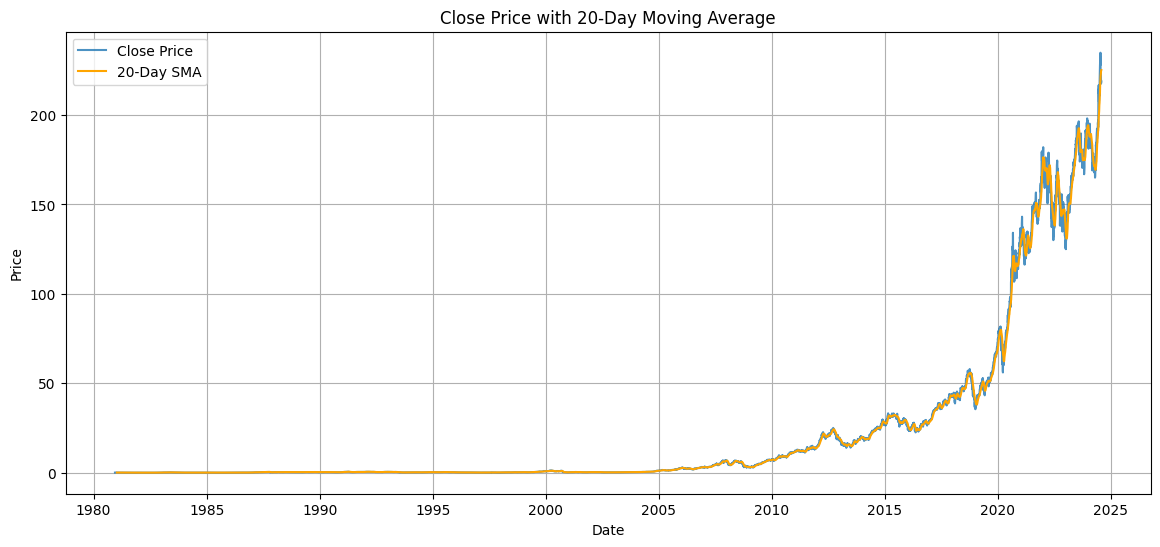

In [10]:
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', alpha=0.8)
plt.plot(df['SMA_20'], label='20-Day SMA', color='orange')
plt.title("Close Price with 20-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


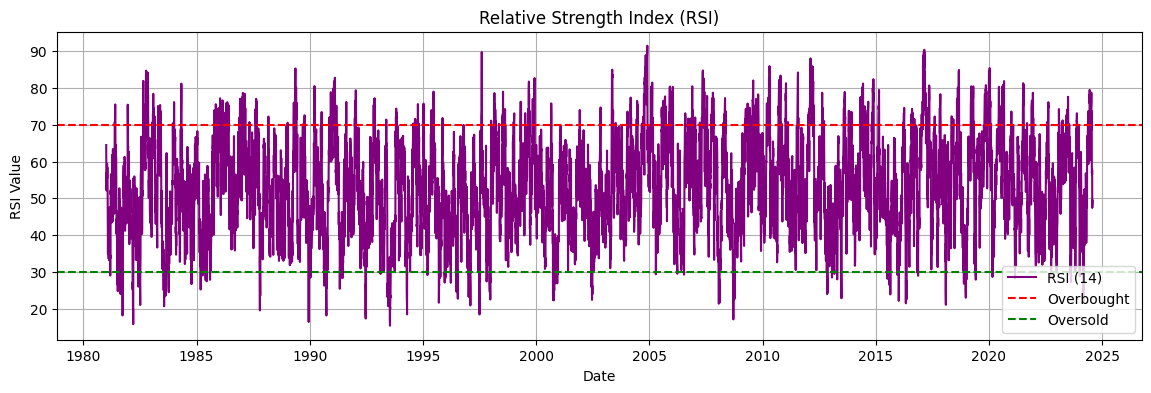

In [11]:
plt.figure(figsize=(14, 4))
plt.plot(df['RSI_14'], label='RSI (14)', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title("Relative Strength Index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.grid(True)
plt.show()


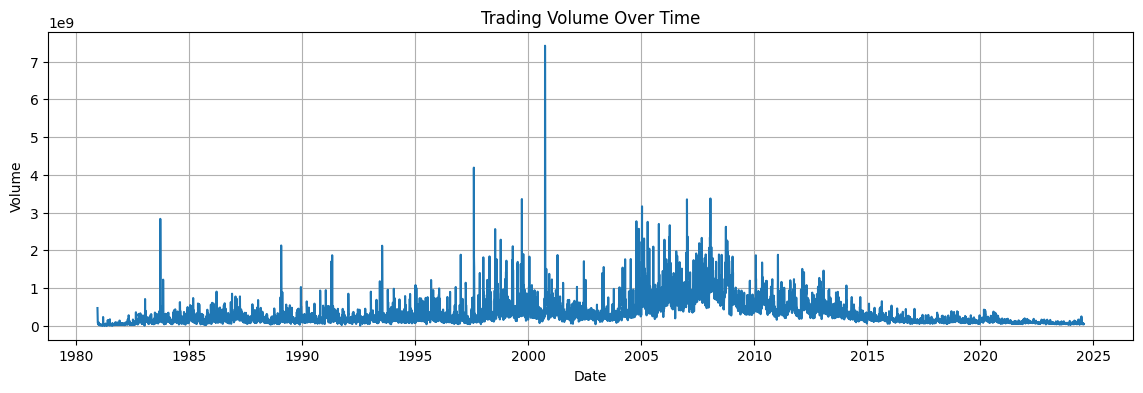

In [12]:
plt.figure(figsize=(14,4))
sns.lineplot(data=df, x=df.index, y='Volume')
plt.title("Trading Volume Over Time")
plt.ylabel("Volume")
plt.grid(True)
plt.show()


In [16]:
# Import necessary library
import pynance as pn

# Load data for a specific stock
aapl = pn.data.get('aapl', start='2020-01-01', end='2023-12-31')

# Show the first few rows of the data
print("Apple Stock Data:\n", aapl.head())




Apple Stock Data:
                Open     High      Low    Close    Volume
Date                                                    
2023-12-29  192.743  193.240  190.581  191.382  42928346
2023-12-28  192.981  193.499  192.018  192.424  34254329
2023-12-27  191.342  192.345  189.949  191.998  48376393
2023-12-26  192.454  192.733  191.679  191.898  29092938
2023-12-22  194.015  194.244  191.818  192.444  37372611


In [17]:
# Calculate Daily Returns
daily_returns = aapl['Close'].pct_change().dropna()

# Calculate Mean Return
mean_return = daily_returns.mean()

# Calculate Volatility (Standard Deviation)
volatility = daily_returns.std()

# Calculate Sharpe Ratio (assuming risk-free rate ≈ 0 for simplicity)
sharpe_ratio = mean_return / volatility

# Display the results
print(f"Mean Daily Return: {mean_return:.4f}")
print(f"Volatility (Standard Deviation): {volatility:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


Mean Daily Return: -0.0007
Volatility (Standard Deviation): 0.0212
Sharpe Ratio: -0.03
